In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [8]:
df = pd.read_csv('c.csv', sep=',', engine='python', encoding='utf-8')
df['Humidity'].value_counts().sort_values(ascending=True)

Humidity
0.12       1
0.13       1
0.14       4
0.16       6
0.15       9
        ... 
0.89    2817
1.00    2886
0.96    3823
0.92    3867
0.93    5679
Name: count, Length: 90, dtype: int64

In [61]:
df = pd.read_csv('c.csv', sep=',', engine='python', encoding='utf-8')



df_hum = df['Humidity'].value_counts()
b = df_hum.argmin()
df_hum = df_hum.reset_index()
df_hum.iloc[b]

Humidity    0.13
count       1.00
Name: 88, dtype: float64

<Axes: xlabel='Category', ylabel='Vote1'>

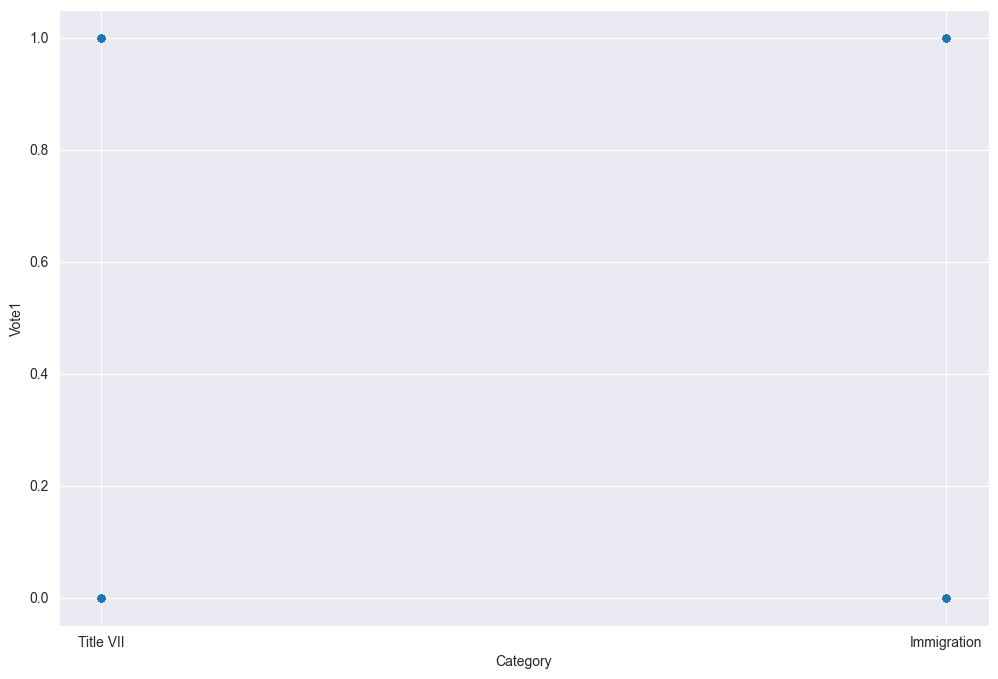

In [75]:
df = pd.DataFrame({
    'Test scores': [8, 2, 4, 6, 7, 1],
    # 'Student’s sex (0 — male, 1 — female)': [0, 0, 1, 1, 0, 1],
    'Number of hours of sleep before the test (in hours)': [4.6, 7.57, 2.62, 11.58, 7.72, 9.94],
})

In [76]:
df.corr(method='pearson')

,Test scores,Number of hours of sleep before the test (in hours)
Test scores,1.000000,-0.206782
Number of hours of sleep before the test (in hours),-0.206782,1.000000


In [1]:
df = pd.read_csv('c.csv', sep=',', engine='python', encoding='utf-8')
df.head(5)

NameError: name 'pd' is not defined

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95528 entries, 0 to 95527
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              95528 non-null  int64  
 1   Visibility (km)         95528 non-null  float64
 2   Temperature (C)         95528 non-null  float64
 3   Summary                 95528 non-null  object 
 4   Precip Type             95528 non-null  object 
 5   Humidity                95518 non-null  float64
 6   Wind Speed (km/h)       95528 non-null  float64
 7   Wind Bearing (degrees)  95528 non-null  float64
 8   Pressure (millibars)    95528 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 6.6+ MB


In [84]:
round(df[ df['Precip Type'] == 'rain']["Temperature (C)"].median(), 2).item()

13.29

In [85]:
round(df[ df['Precip Type'] == 'rain']["Temperature (C)"].std(), 2).item()

8.32

In [87]:
round(df[ df['Precip Type'] == 'rain']["Temperature (C)"].max() - df[ df['Precip Type'] == 'rain']["Temperature (C)"].min(), 2).item()

39.9

In [89]:
df[ df['Precip Type'] == 'snow']["Summary"].value_counts()

Summary
Foggy                       2982
Overcast                    2600
Mostly Cloudy               1886
Partly Cloudy               1720
Clear                       1392
Breezy and Overcast           56
Breezy and Mostly Cloudy      26
Breezy and Partly Cloudy       7
Name: count, dtype: int64

In [115]:
cond = [(df["Temperature (C)"] < 0), (df["Temperature (C)"] >= 0) & (df["Temperature (C)"] <= 10), (df["Temperature (C)"] > 10)]
val = [0, 1, 2]

df["Temperature_Binned"] = np.select(
    condlist=cond,
    choicelist=val,
    default=0,
)


In [119]:
round(df[df["Temperature_Binned"] == 0]['Humidity'].mean().item(), 2)

0.86

In [134]:
round(
    df[
        (df['Precip Type'] == 'rain')
        & (df["Wind Speed (km/h)"] > df["Wind Speed (km/h)"].mean())
    ]["Temperature (C)"].median().item(),
    2
)

12.67

In [370]:
df = pd.read_csv('c.csv', sep=',', engine='python', encoding='utf-8')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95528 entries, 0 to 95527
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              95528 non-null  int64  
 1   Visibility (km)         95528 non-null  float64
 2   Temperature (C)         95528 non-null  float64
 3   Summary                 95528 non-null  object 
 4   Precip Type             95528 non-null  object 
 5   Humidity                95518 non-null  float64
 6   Wind Speed (km/h)       95528 non-null  float64
 7   Wind Bearing (degrees)  95528 non-null  float64
 8   Pressure (millibars)    95528 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 6.6+ MB


In [379]:
# round(df["Humidity"].median().item(), 2)
# df.where(~df["Humidity"].isna(), df["Humidity"].mean())
round(df.where(~df["Humidity"].isna(), df["Humidity"].mean())["Humidity"].median().item(), 2)



0.78

<Axes: xlabel='Temperature (C)', ylabel='Humidity'>

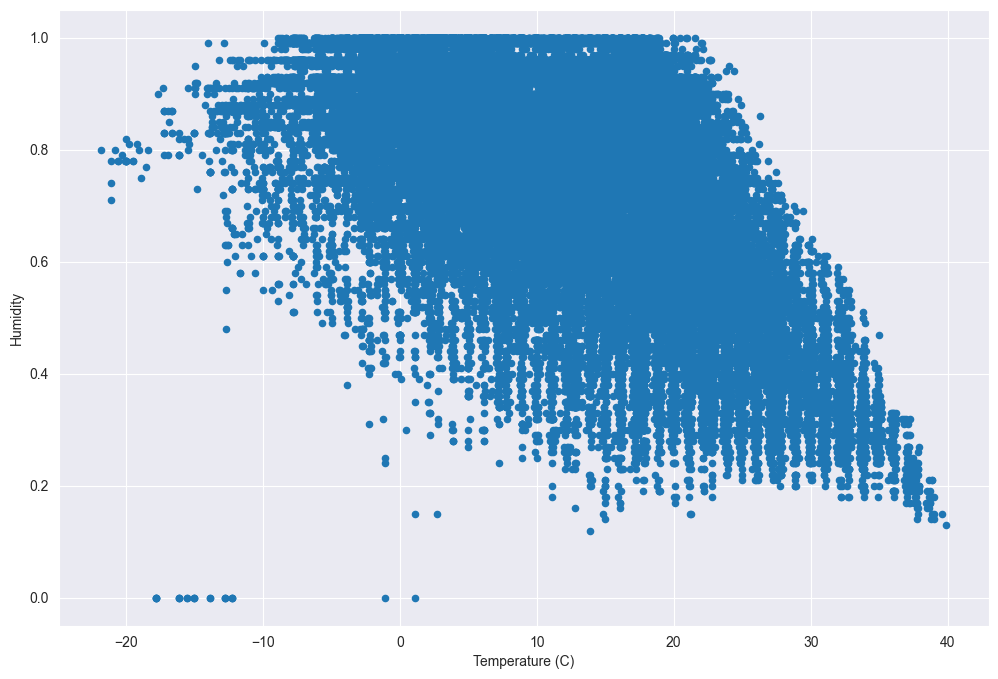

In [151]:
df.plot(kind='scatter', x='Temperature (C)', y='Humidity', figsize=(12, 8))

In [195]:
# df.groupBy(kind='scatter', x='Precip Type', y='Humidity', figsize=(12, 8))

# df.plot(kind='scatter', x='Precip Type', y='Humidity', figsize=(12, 8))
# df2["Precip Type"].value_counts()
# df2
# _, ax = plt.subplots()

# ax.bar(df['Precip Type'], df['Humidity'].mean())
df3 = df.groupby('Precip Type')['Humidity'].median()
df3
# df3.plot()



Precip Type
rain    0.76
snow    0.88
Name: Humidity, dtype: float64

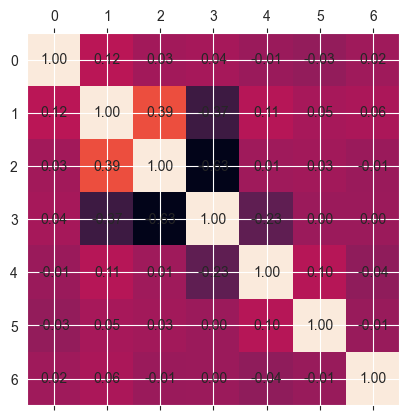

In [217]:
df4 = df.select_dtypes(include=['number'])
corr = df4.corr()
plt.matshow(corr)

for (x, y), value in np.ndenumerate(corr):
    plt.text(x, y, f"{value:.2f}", va="center", ha="center")

In [314]:
df = pd.read_csv('MarvelComicCaracters.csv', sep=';', engine='python', encoding='utf-8')
df.head(5)
# df.info()

,name,align,eye,hair,sex,appearances,first_appearance
0,Spider-Man (Peter Parker),Добрый персонаж,Карие глаза,Каштановые волосы,Мужской персонаж,4043.0,1962.0
1,Captain America (Steven Rogers),Добрый персонаж,Голубые глаза,Белые волосы,Мужской персонаж,3360.0,1941.0
2,"Wolverine (James \""Logan\"" Howlett)",Нейтральный персонаж,Голубые глаза,Черные волосы,Мужской персонаж,3061.0,1974.0
3,"Iron Man (Anthony \""Tony\"" Stark)",Добрый персонаж,Голубые глаза,Черные волосы,Мужской персонаж,2961.0,1963.0
4,Thor (Thor Odinson),Добрый персонаж,Голубые глаза,Русые волосы,Мужской персонаж,2258.0,1950.0


In [315]:
# df2 = df[['align', 'appearances']].dropna()
df2 = df[['align', 'appearances']].dropna(subset=['appearances'])

In [61]:
# df2.groupby('align').quantile(q=[0.25, 0.75]).unstack()

df2.groupby('align').describe()['appearances']['75%'] - df2.groupby('align').describe()['appearances']['25%']


# np.quantile(a=df2['appearances'].tolist(), q=0.75)

align
Добрый персонаж         13.0
Злой персонаж            5.0
Нейтральный персонаж     8.0
dtype: float64

In [316]:
df2 = df[['align', 'appearances']].dropna(subset=['appearances'])

df2['std3'] = df2['appearances'].std().item() * 3
df2['avg'] = df2['appearances'].mean().item()
df2[
    ~df2['appearances'].between(
        df2['avg'] - df2['std3'],
        df2['avg'] + df2['std3'],
    )
].shape



(128, 4)

In [318]:
df3 = df[
    (df['sex'] == 'Женский персонаж')
    & (df['align'] == 'Добрый персонаж')
]
a = df3.mode()["hair"][0]

df3 = df3.dropna(subset=['appearances'])

irq = df3.describe()['appearances']['75%'].item() - df3.describe()['appearances']['25%'].item()

df4 = df3[
    df3['appearances'].between(
        df3.describe()['appearances']['25%'].item() - 1.5 * irq,
        df3.describe()['appearances']['75%'].item() + 1.5 * irq,
    )
]
b = df4.mode()["hair"][0]

print(a == b)



True


In [319]:
df = pd.read_csv('TenthCircuit.csv', sep=',', engine='python', encoding='utf-8')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     954 non-null    object
 1   Date      954 non-null    object
 2   Issue     954 non-null    int64 
 3   Judge1    954 non-null    object
 4   Judge2    954 non-null    object
 5   Judge3    954 non-null    object
 6   Vote1     954 non-null    int64 
 7   Vote2     954 non-null    int64 
 8   Vote3     954 non-null    int64 
 9   Category  954 non-null    object
dtypes: int64(4), object(6)
memory usage: 74.7+ KB


<Axes: xlabel='Category,Vote'>

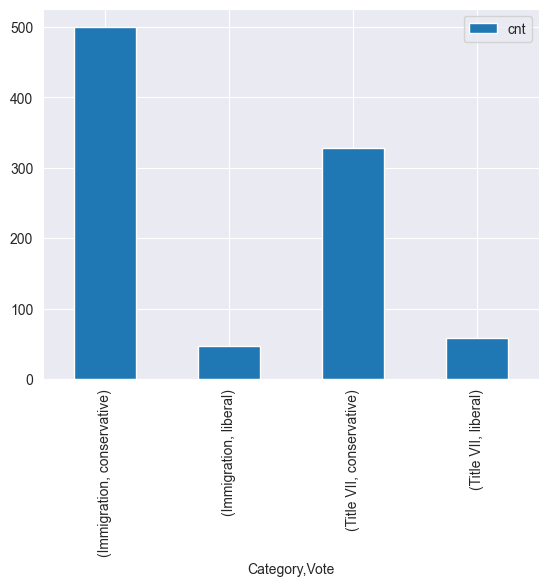

In [262]:
# df2 = df[
#     (df['Vote1'] == df['Vote2']) & (df['Vote1'] == df['Vote3'])
# ]
#
# df3 = df2[['Category', 'Vote1']]
# df3 = df3.loc[df3['cnt'] == 1]
# df3
# df2["Category"].value_counts()

# _, ax = plt.subplots(1, 1, figsize=(14, 5))

# ax.plot(df3['Category'], df3["Vote1"])
df4 = df3.groupby(['Category', 'Vote']).size().to_frame('cnt')
df4.plot(kind='bar')
# df3["Vote"] = np.select(
#     [(df3["Vote1"] == 1), (df3["Vote1"] == 0)],
#     ['liberal', 'conservative'],
#     default='0',
# )


df4.plot(kind='bar')




<Axes: xlabel='mm'>

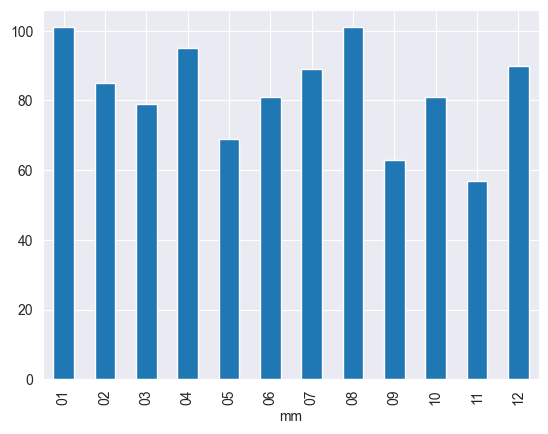

In [312]:
# df['mm'] = df['Date'].apply(lambda x: x.split('/')[0])
df5 = df.groupby('mm')['Issue'].sum()

df5.plot(kind='bar')

In [369]:
df6 = pd.merge(
    df['Title'].value_counts().sort_values(ascending=False).to_frame('cnt'),
    df.groupby('Title')['Issue'].sum().to_frame('issue_cnt'),
    how='inner',
    left_on='Title',
    right_on='Title',
)
df6['times'] = df6['cnt'] * df6['issue_cnt']

max_titles = df6[
    df6['times'] == (
        df6['times']
        .max()
        .item()
    )
].reset_index()['Title']

max_title_judges = df[ df['Title'].isin(max_titles) ]

all_judges = pd.concat([
    max_title_judges['Judge1'],
    max_title_judges['Judge2'],
    max_title_judges['Judge3'],
])

all_judges.value_counts(ascending=False).index[0]



'Lucero'